In [3]:
# H0:연속적인 값이 임의적이다. H1: 연속적인 값이 임의적이 아니다 연관이있다.
import pandas as pd

data=['a','a','b','b','a','a','a','a','b','b','b']
from statsmodels.sandbox.stats.runs import runstest_1samp
data=pd.DataFrame(data,columns=['product'])
data['label']=data['product'].map({'a':0,'b':1})
runstest_1samp(data['label'],cutoff=.5, correction=True)

(-1.2539054635675788, 0.20987636894228046)

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# 지지도: 얼마나 자주?

# 신뢰도: 얼마나 자주 함께?

# 향상도: 우연이 아닌 관계?

In [ ]:
dataset=[['Apple','Beer','Rice','Chicken',],
        ['Apple','Beer','Rice'],
        ['Apple','Beer'],
        ['Apple','Bananas'],
        ['Milk','Beer','Rice','Chicken'],
        ['Milk','Beer','Rice'],
        ['Milk','Beer'],
        ['Apple','Bananas']]
te=TransactionEncoder()
te_ary=te.fit_transform(dataset)
print(te.columns_)
df=pd.DataFrame(te_ary,columns=te.columns_)
apriori(df,min_support=0.6,use_colnames=True)
frequent_itemsets=apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
print(frequent_itemsets)

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']
   support       itemsets  length
0    0.625        (Apple)       1
1    0.750         (Beer)       1
2    0.375         (Milk)       1
3    0.500         (Rice)       1
4    0.375  (Beer, Apple)       2
5    0.375   (Beer, Milk)       2
6    0.500   (Beer, Rice)       2


In [17]:
df=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/groceries.csv")


In [ ]:
df_split=df.iloc[:,0].str.split(',',expand=True)
df_split_ary=df_split.values
groceries=[]
for i in range(len(df_split_ary)):
    groceries.append(list(filter(None,df_split_ary[i])))
print(groceries)

In [ ]:
te=TransactionEncoder()
te_ary=te.fit_transform(groceries)
print(te.columns_)
df=pd.DataFrame(te_ary,columns=te.columns_)
apriori(df,min_support=0.6,use_colnames=True)
frequent_itemsets=apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
print(frequent_itemsets)

In [26]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,1.0,0.009574,1.292384,0.512171,0.087191,0.226236,0.238957
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,1.0,0.011669,1.332612,0.708220,0.120677,0.249594,0.245455
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,1.0,0.007844,1.251271,0.389532,0.074113,0.200813,0.244103
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,1.0,0.003836,1.166909,0.386326,0.047440,0.143035,0.180971
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,1.0,0.003299,1.153733,0.289254,0.042584,0.133249,0.200450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"(yogurt, soda)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,1.0,0.003484,1.206381,0.341968,0.038447,0.171074,0.211943
121,"(yogurt, tropical fruit)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,1.0,0.007668,1.542474,0.521334,0.056184,0.351691,0.288326
122,"(whole milk, tropical fruit)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,1.0,0.009250,1.340679,0.637444,0.090909,0.254109,0.233387
123,"(yogurt, whipped/sour cream)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,1.0,0.005580,1.565664,0.523661,0.040996,0.361293,0.283544


In [27]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules['antecedent_len']=rules['antecedents'].apply(lambda x:len(x))
rules[(rules['antecedent_len']>=2)&(rules['confidence']>=0.4)&(rules['lift']>=3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len
420,"(citrus fruit, root vegetables)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,1.0,0.006948,1.949012,0.681957,0.051646,0.486920,0.319903,2
492,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,1.0,0.008231,1.941197,0.683334,0.060835,0.484854,0.324062,2


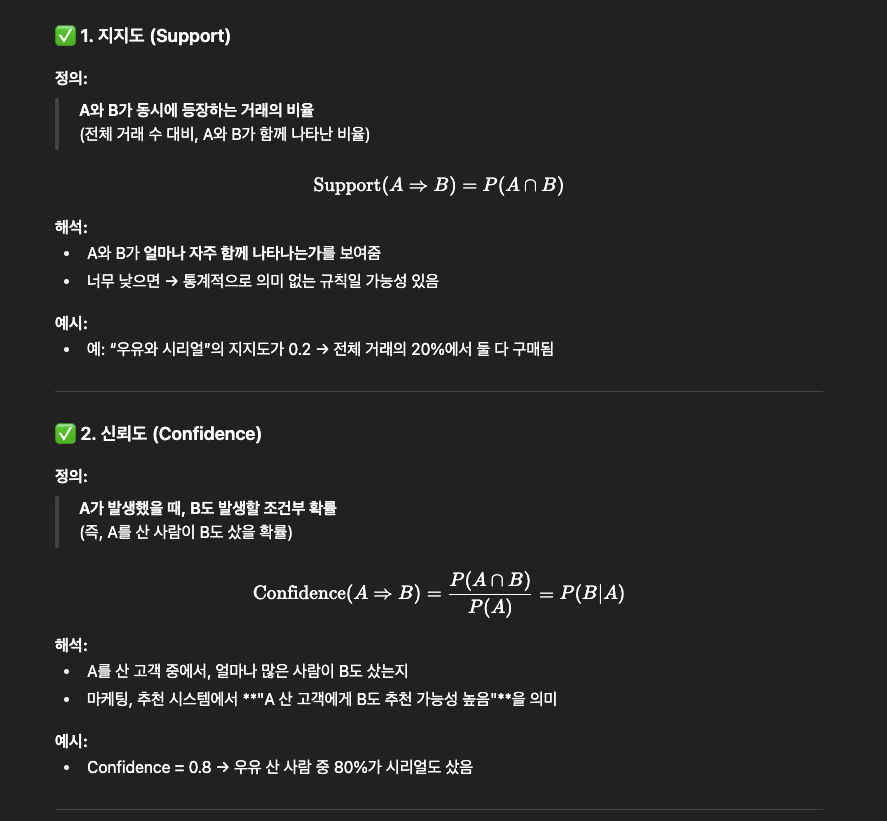
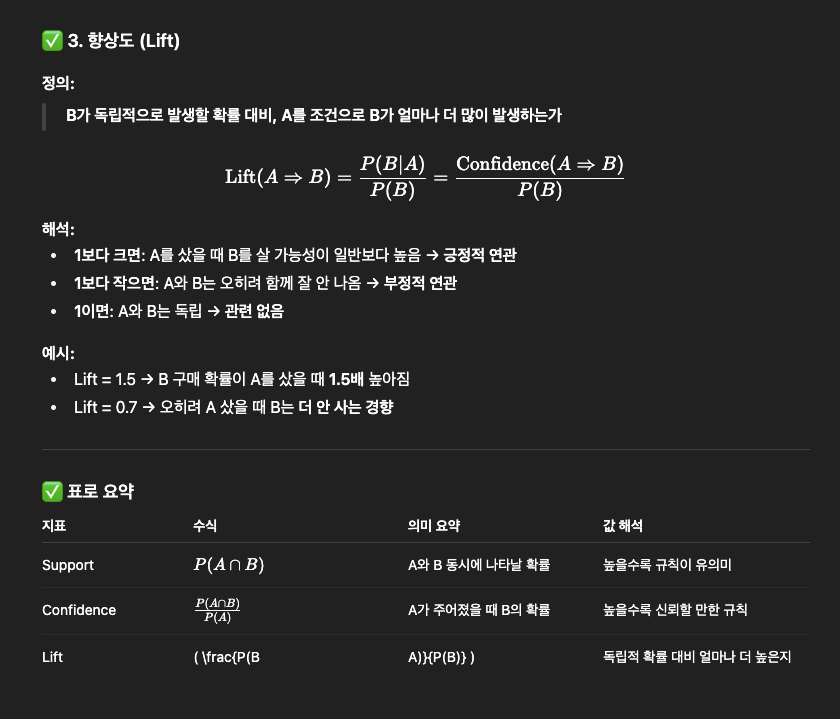